<a href="https://colab.research.google.com/github/rutik1093/Employee-Attrition-Analysis-and-Prediction/blob/main/Employee_Attrition_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [273]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [350]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1. Data Exploration**


In [351]:
# Reading our csv data
data= pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition (1).csv')

In [352]:
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [353]:
# To get statistical data
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [354]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**Data Cleaning**

In [355]:
# Check Null Values in dataset
data.isnull().sum()

# there is no null values in dataset

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [356]:
# Check for duplicate rows
print(f"Duplicate Rows: {data.duplicated().sum()}")
print(f"Duplicate Columns: {data.duplicated().sum()}")

Duplicate Rows: 0
Duplicate Columns: 0


In [357]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [358]:
#  drop the column
X = data.drop(['Attrition'], axis=1)
y= data['Attrition']

In [359]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [360]:
y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

**Data Labelling**

In [361]:
!pip install category-encoders

I used category encoders as a One Hot Encoding to tranform the data of Data set which has all categorical data . one Hot Encoding(category-encoders) help to convert )

In [362]:

import category_encoders as ce

In [363]:
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [364]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [365]:
# Target Variable(Attrition)
data['Attrition'] = data['Attrition'].replace({'No':0,'Yes':1})

In [366]:
encoder = ce.OrdinalEncoder(['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime',''])
data = encoder.fit_transform(data)

In [367]:
data.head(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,1,2,1,1,1,2,1,94,3,2,1,4,1,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,2,8,1,1,1,2,3,2,61,2,2,2,2,2,5130,24907,1,1,2,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,2,2,2,2,1,4,4,2,92,2,1,3,3,1,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,2,3,4,1,1,5,4,1,56,3,1,2,3,2,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0


**Data Encoding**

In [368]:
# To Scale the values for a specific range mean of 0 and standard deviation of 1.
from sklearn.preprocessing import StandardScaler

In [369]:
#  drop the column
X = data.drop(['Attrition'], axis=1)
y= data['Attrition']

In [370]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [416]:
X

array([[ 0.4463504 , -0.59004834,  0.74252653, ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [ 1.32236521,  0.91319439, -1.2977746 , ...,  0.76499762,
        -0.36871529,  0.80654148],
       [ 0.008343  , -0.59004834,  1.41436324, ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [-1.08667552, -0.59004834, -1.60518328, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [ 1.32236521,  0.91319439,  0.54667746, ...,  0.48889978,
        -0.67914568,  1.08689522],
       [-0.32016256, -0.59004834, -0.43256792, ..., -0.33939374,
        -0.36871529, -0.59522723]])

In [372]:
import matplotlib.pyplot as plt

here we can observed 237 who have attrition category Yes which meanse either they resign from there position or retired or may be they undergo in layoff and around 1250 whose category is No which means they still working in the company. Here is Problem like Data Imbalanced . we have to solve this problem for incraese the performance of model. It Gives us very good accuracy but model can't learn find True pattern in the data

In [373]:
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,1,2,1,1,1,2,1,94,3,2,1,4,1,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,2,8,1,1,1,2,3,2,61,2,2,2,2,2,5130,24907,1,1,2,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,2,2,2,2,1,4,4,2,92,2,1,3,3,1,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,2,3,4,1,1,5,4,1,56,3,1,2,3,2,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,2,2,1,3,1,7,1,2,40,3,1,3,2,2,3468,16632,9,1,2,12,3,4,80,1,6,3,3,2,2,2,2
5,32,0,2,1005,2,2,2,1,1,8,4,2,79,3,1,3,4,1,3068,11864,0,1,2,13,3,3,80,0,8,2,2,7,7,3,6
6,59,0,1,1324,2,3,3,3,1,10,3,1,81,4,1,3,1,2,2670,9964,4,1,1,20,4,1,80,3,12,3,2,1,0,0,0
7,30,0,1,1358,2,24,1,1,1,11,4,2,67,3,1,3,3,3,2693,13335,1,1,2,22,4,2,80,1,1,2,3,1,0,0,0
8,38,0,2,216,2,23,3,1,1,12,4,2,44,2,3,4,3,1,9526,8787,0,1,2,21,4,2,80,0,10,2,3,9,7,1,8
9,36,0,1,1299,2,27,3,3,1,13,3,2,94,3,2,5,3,2,5237,16577,6,1,2,13,3,2,80,2,17,3,2,7,7,7,7


**Exploratory Data Analysis**

<ipython-input-374-2ab6f50ae78d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y ='Attrition',data=data,palette=colors)


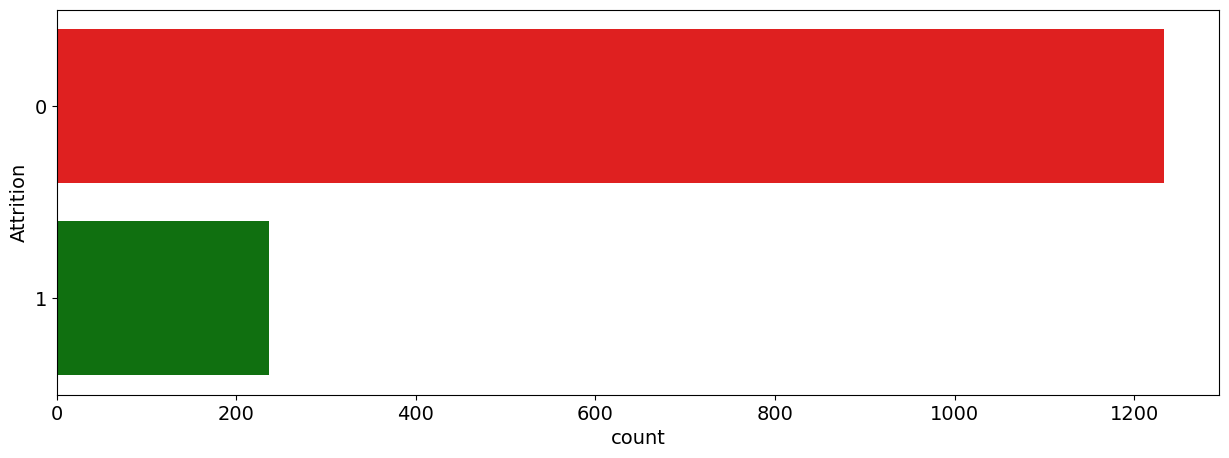

In [374]:
plt.figure(figsize=(15,5))
plt.rc("font", size=14)
colors = ["red", "green"]
sns.countplot(y ='Attrition',data=data,palette=colors)
plt.show()

In [375]:
# Analysis features column with attrition

<ipython-input-376-d6e37607a523>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'],hist=False)


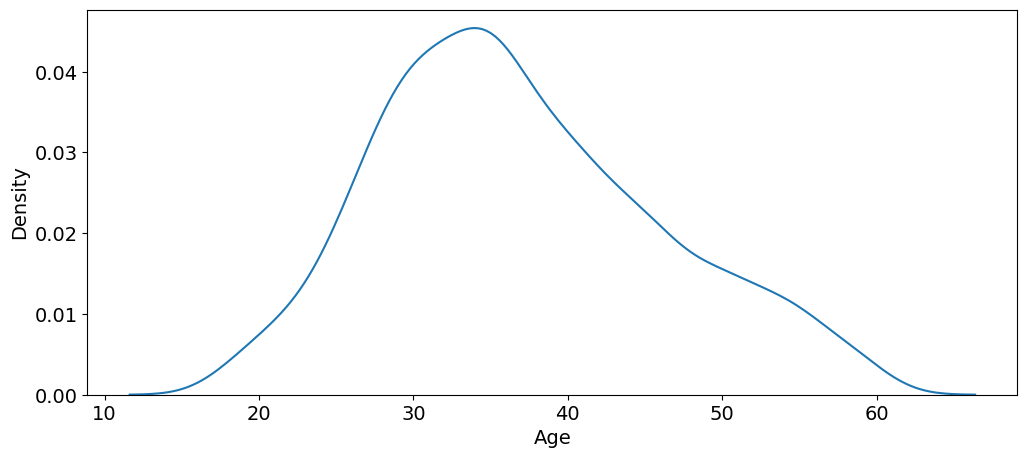

In [376]:
# distribution of age
plt.figure(figsize=(12,5))
sns.distplot(data['Age'],hist=False)
plt.show()

most of employees are age between 25 to 40.

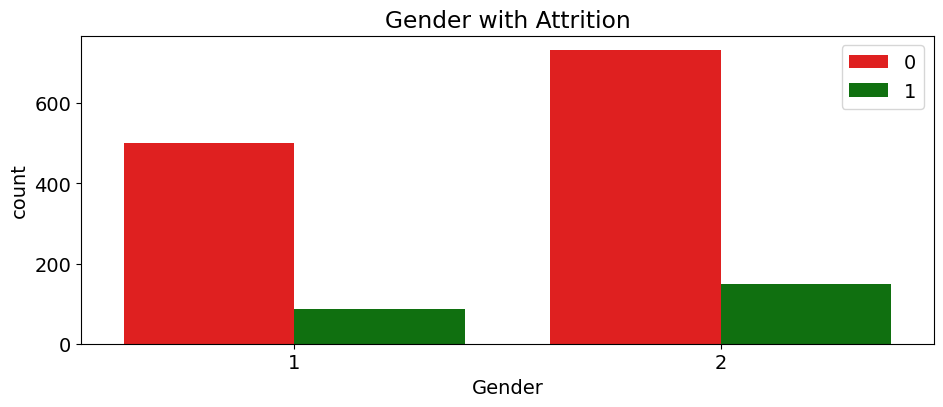

In [377]:
# most male of female employes Attriate
# Gender with Attrition
plt.figure(figsize=(11,4))
colors = ["red", "green"]
sns.countplot(x='Gender',hue='Attrition', data=data, palette=colors)
plt.title("Gender with Attrition")
plt.legend(loc='best')
plt.show()

In [378]:
data['Gender'].value_counts()

Gender
2    882
1    588
Name: count, dtype: int64

In [379]:
#14% attrition in female
#17% attrition in male

data.Attrition[data.Gender==2].value_counts()



Attrition
0    732
1    150
Name: count, dtype: int64

In [380]:

data.Attrition[data.Gender==1].value_counts()

Attrition
0    501
1     87
Name: count, dtype: int64

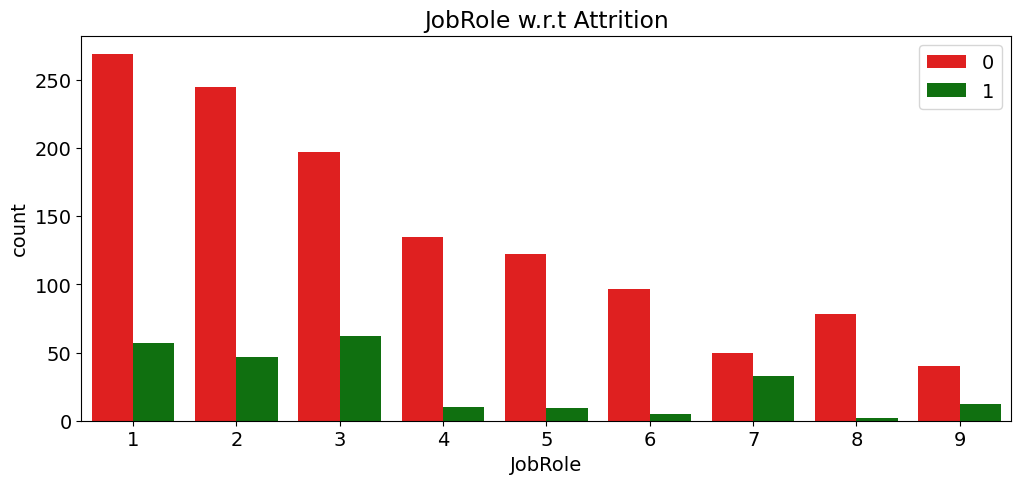

In [381]:
# JobRole
plt.figure(figsize=(12,5))
colors = ["red", "green"]
sns.countplot(x='JobRole',hue='Attrition', data=data, palette=colors)
plt.title("JobRole w.r.t Attrition")
plt.legend(loc='best')

plt.show()

1:Sales Executive , 2: Research Scientist , 3: Laboratory Technician,  4 Manufacturing Director, 5:Healthcare Representative 6. Manager 7: Sales Representative 8: Research Director 9: Human Resorces

here we can able to see at which post most people are leaving the jobs.
- There are more people working in the R&D department, but those in sales roles like sales executives or representatives tend to leave their jobs early.
- More men leave their jobs compared to women.

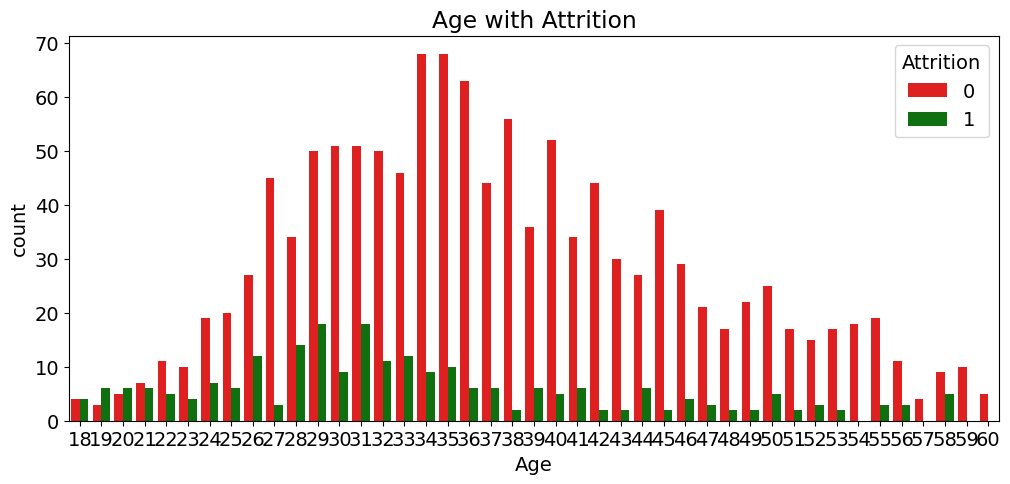

In [382]:
# Compared DistanceFromHome with Attrition
plt.figure(figsize=(12,5))
colors=["red", "green"]
sns.countplot(x='Age', hue='Attrition', data=data, palette=colors)
plt.title("Age with Attrition")
plt.show()

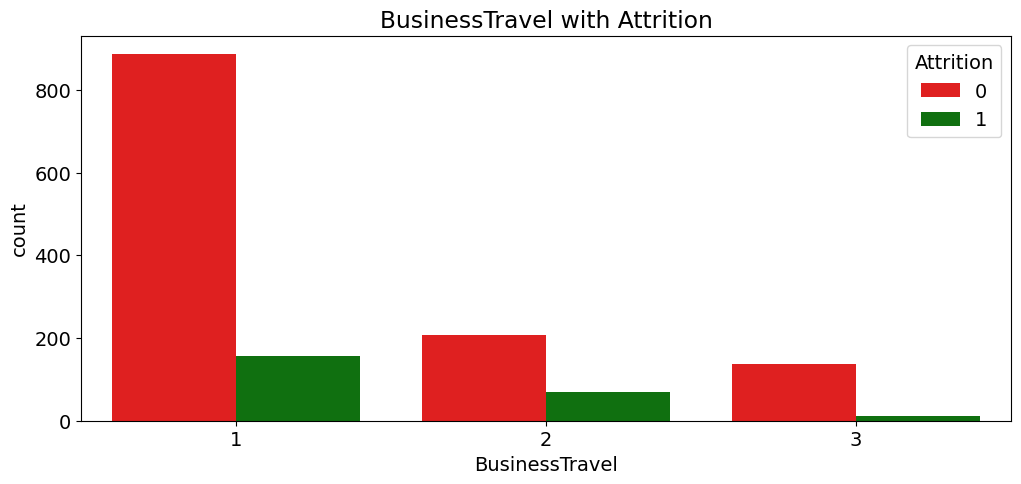

In [383]:
# Compared BusinessTravel with Attrition
plt.figure(figsize=(12,5))
colors=["red", "green"]
sns.countplot(x='BusinessTravel', hue='Attrition', data=data, palette=colors)
plt.title("BusinessTravel with Attrition")
plt.show()

1: Travel_Rarely ,  2: Travel_Frequently 3: Non-Travel

In [384]:
data.BusinessTravel.unique()

array([1, 2, 3])

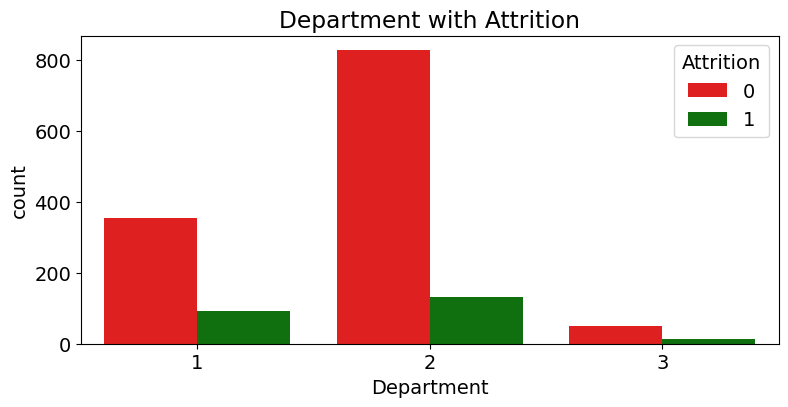

In [385]:
# Compared Department with Attrition

plt.figure(figsize=(9,4))
colors=["red", "green"]
sns.countplot(x='Department', hue='Attrition', data=data, palette=colors)
plt.title("Department with Attrition")
plt.show()

1: Sales,  2: Research & Development,  3: Human Resources  

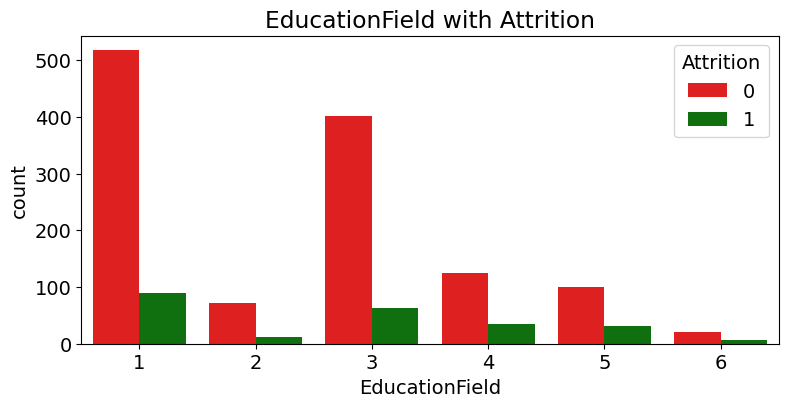

In [386]:
# Compared EducationField with Attrition

plt.figure(figsize=(9,4))
colors=["red", "green"]
sns.countplot(x='EducationField', hue='Attrition', data=data, palette=colors)
plt.title("EducationField with Attrition")
plt.show()

1: Life Sciences 2: Other 3: Medical 4: Marketing 5: Technical Degree


In [387]:
data['EducationField'][37]

4

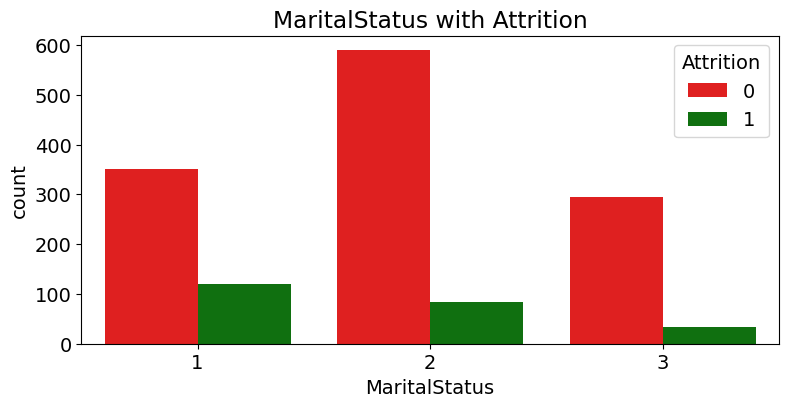

In [388]:
# Compared MaritalStatus with Attrition

plt.figure(figsize=(9,4))
colors=["red", "green"]
sns.countplot(x='MaritalStatus', hue='Attrition', data=data, palette=colors)
plt.title("MaritalStatus with Attrition")
plt.show()

1 :Single
2: Married
3: Divorced

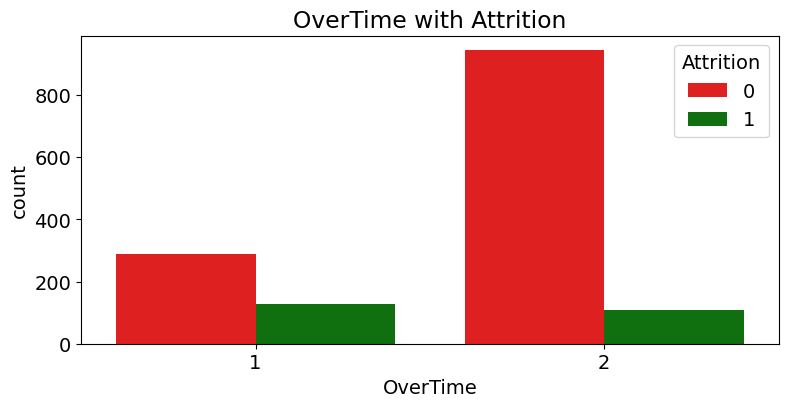

In [389]:
# Compared OverTime with Attrition

plt.figure(figsize=(9,4))
colors=["red", "green"]
sns.countplot(x='OverTime', hue='Attrition', data=data, palette=colors)
plt.title("OverTime with Attrition")
plt.show()

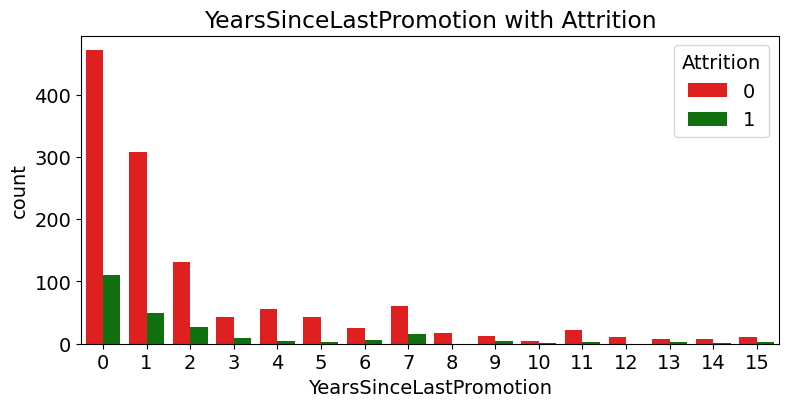

In [390]:
# Compared YearsSinceLastPromotion with Attrition

plt.figure(figsize=(9,4))
colors=["red", "green"]
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', data=data, palette=colors)
plt.title("YearsSinceLastPromotion with Attrition")
plt.show()

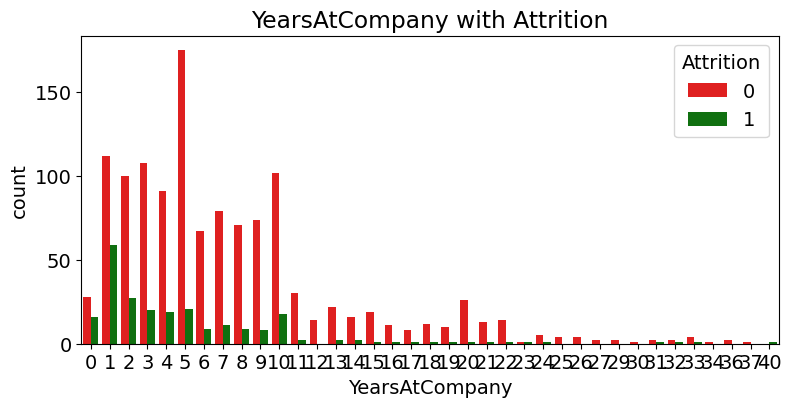

In [391]:
# Compared YearsAtCompany with Attrition

plt.figure(figsize=(9,4))
colors=["red", "green"]
sns.countplot(x='YearsAtCompany', hue='Attrition', data=data, palette=colors)
plt.title("YearsAtCompany with Attrition")
plt.show()

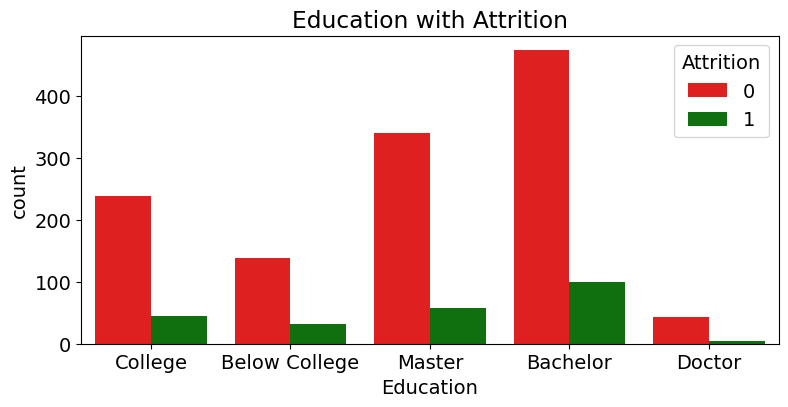

In [392]:
# Compared Education with Attrition
edu_map = {1 :'Below College', 2: 'College', 3 :'Bachelor', 4 :'Master', 5: 'Doctor'}
plt.figure(figsize=(9,4))
colors=["red", "green"]
sns.countplot(x=data['Education'].map(edu_map), hue='Attrition', data=data, palette=colors)
plt.title("Education with Attrition")
plt.show()

Analysis

More employees have bachelor's degrees than master's degrees. The attrition rate among bachelor's degree holders might be higher because they have higher expectations from companies.


**This data set is Imbalanced so I am going to use oversampling to to handle data imbalance.**


In [393]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
print(Counter(y))
rus = RandomOverSampler(random_state = 42)
X_over, y_over = rus.fit_resample(X,y)
print(Counter(y_over))

Counter({0: 1233, 1: 237})
Counter({1: 1233, 0: 1233})


**Random Forest Classifier**

In [394]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=100)
print('shape of X and y respectively (train) :', X_train.shape, y_train.shape)
print('shape of X and y respectively (test) :', X_test.shape, y_test.shape)

shape of X and y respectively (train) : (1726, 34) (1726,)
shape of X and y respectively (test) : (740, 34) (740,)


In [395]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model.fit(X_train, y_train)
Y_pred= model.predict(X_test)
score= model.score(X_train, y_train)
print(score)
score = model.score(X_test, y_test)
print('Testing Score:', score)


1.0
Testing Score: 0.9635135135135136


**Confusion matrix**

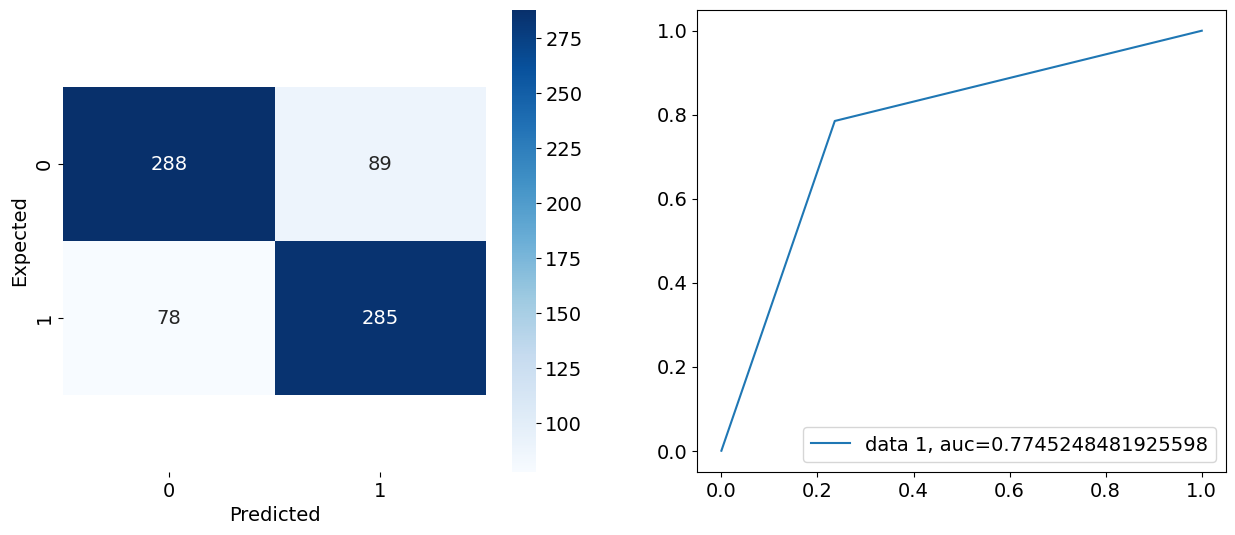

In [396]:
fig = plt.figure(figsize = (15,6))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted')
plt.ylabel('Expected')

ax2 = fig.add_subplot(1,2,2)
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  prediction)
auc = roc_auc_score(y_test, prediction)
ax2 = plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**Logistic Regression**

In [397]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

prediction=logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test,prediction)
print("Accuracy Score -", accuracy_score(y_test , prediction))

Accuracy Score - 0.7743243243243243


**DecisionTreeClassifier**

In [398]:
 from sklearn.tree import DecisionTreeClassifier
 from sklearn.metrics import accuracy_score

In [399]:
## GridsearchCV # We Used GridSearchCV for Automate the All permutation and combination

In [400]:
#Gini

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=0)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=0)

In [401]:
y_pred_en = clf_en.predict(X_test)

In [402]:
print('Model accuracy score with criterion entropy index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy index: 0.9108


In [403]:
from sklearn.model_selection import GridSearchCV

In [404]:
# Hyper parameters range intialization for tuning

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12,13,14,15,16,17,18,19,20],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [405]:
tuning_model=GridSearchCV(clf_en,param_grid=parameters,scoring='accuracy',cv=5,verbose=3)

In [406]:
tuned_hyper_model= DecisionTreeClassifier(max_depth=20,
                                         max_features='log2',
                                         max_leaf_nodes=90,
                                         min_samples_leaf=9,
                                         min_weight_fraction_leaf=0.1,
                                         splitter='best')


In [407]:
# fitting model


tuned_hyper_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20, max_features='log2', max_leaf_nodes=90,
                       min_samples_leaf=9, min_weight_fraction_leaf=0.1)

In [408]:
# prediction

tuned_pred=tuned_hyper_model.predict(X_test)

In [409]:
print("Accuracy Score -", accuracy_score(y_test , tuned_pred))

Accuracy Score - 0.6405405405405405


In [410]:
ran_train = round(tuned_hyper_model.score(X_train, y_train) * 100, 2)
print("Training Accuracy    :",ran_train ,"%")

ran_test = round(tuned_hyper_model.score(X_test, y_test) * 100, 2)
print("Testing Accuracy    :",ran_test ,"%")

Training Accuracy    : 67.61 %
Testing Accuracy    : 64.05 %


**AdaBoostClassifier**


In [411]:
from sklearn.metrics import classification_report,f1_score,precision_score,recall_score,accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.ensemble import AdaBoostClassifier

In [412]:
ada = AdaBoostClassifier(n_estimators=80, learning_rate=0.5, algorithm='SAMME.R',
                         random_state=42)

ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

ada_train = round(ada.score(X_train, y_train) * 100, 2)
ada_accuracy = round(accuracy_score(y_pred_ada, y_test) * 100, 2)

print("Training Accuracy    :",ada_train ,"%")
print("Model Accuracy Score :",ada_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 84.76 %
Model Accuracy Score : 82.43 %
--------------------------------------------------------
